In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
def f(x):
    '''The function we are approximating'''
    return 1 / x


def f_taylor(x, a, N=3):
    '''The Taylor approximation of f about a at x, with N degrees of approxiation'''
    return np.sum([ ((-1) ** n) *
                   (a ** -(n + 1))
                   * ((x - a) ** n)
                   / (np.math.factorial(n))
                   for n in range(N)])


def f_mult_taylor(x, a, N=3):
    '''The multiplicative Taylor approximation of f about a at x, with at most 2 degrees of approimation'''
    term_1 = (1 / a)
    # print(term_1)
    term_2 = (np.e ** (-1 / a)) ** (x - a)
    # print(term_2)
    term_3 = (np.e ** (1 / a ** 2)) ** (((x - a) ** 2) / 2)
    # print(term_3)
    all_terms = [term_1, term_2, term_3]
    return np.product(all_terms[:min(N, 3)])

In [6]:
a = 1
x = 1.5
N = 3

taylor_approx = f_taylor(x, a, N)
print('Standard Taylor approximation error: ', abs(f(x) - taylor_approx))

mult_approx = f_mult_taylor(x, a, N)
print('Multiplicative Taylor approximation error:', abs(f(x) - mult_approx))

Standard Taylor approximation error:  0.04166666666666663
Multiplicative Taylor approximation error: 0.020622612124305606


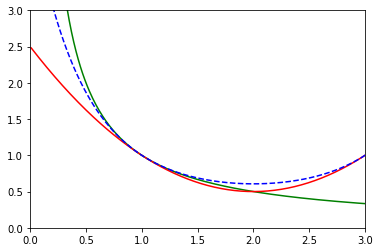

In [7]:
x_vals = [i / 100 for i in range(1, 1000)]
plt.plot(x_vals, [f(i) for i in x_vals], 'g')
plt.plot(x_vals, [f_taylor(i, a, N) for i in x_vals], 'r')
plt.plot(x_vals, [f_mult_taylor(i, a, N) for i in x_vals], 'b--')
plt.xlim(0, 3)
plt.ylim(0, 3);

In [5]:
%timeit f_taylor(x, a, N)
%timeit f_mult_taylor(x, a, N)

5.97 µs ± 79.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
5.14 µs ± 71.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
